<style>
pre {
 white-space: pre-wrap !important;
}
.table-striped > tbody > tr:nth-of-type(odd) {
    background-color: #f9f9f9;
}
.table-striped > tbody > tr:nth-of-type(even) {
    background-color: white;
}
.table-striped td, .table-striped th, .table-striped tr {
    border: 1px solid black;
    border-collapse: collapse;
    margin: 1em 2em;
}
.rendered_html td, .rendered_html th {
    text-align: left;
    vertical-align: middle;
    padding: 4px;
}
</style>

# Advanced plotting examples

If you want to try out this notebook with a live Python kernel, use mybinder:

<a class="reference external image-reference" href="https://mybinder.org/v2/gh/vaexio/vaex/latest?filepath=docs%2Fsource%2Fexample_advanced_plotting.ipynb"><img alt="https://mybinder.org/badge_logo.svg" src="https://mybinder.org/badge_logo.svg" width="150px"></a>



Vaex uses matplotlib for creating plots, which allows for great flexibility. To avoid repetative "boilerplate" code, Vaex tries to cover many use-cases where you want to plot one or more panels using a simple declarative style. 


The following examples will make use of the example dataset, which is a the results of a numerical simulation of how a galaxy like our own Milky Way was formed [(source)](https://ui.adsabs.harvard.edu/abs/2000MNRAS.319..657H/abstract). The data contains the 3D position, velocity, angular momentum, energy and iron content for each start particle in the simulation. 

Let us start by loading the data:

In [1]:
import vaex
import numpy as np
import pylab as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = vaex.example()
df.head()

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.23187,-0.396929,-0.598058,301.155,174.059,27.4275,-149431,407.389,333.956,-1.00539
1,23,-0.163701,3.65422,-0.254906,-195,170.472,142.53,-124248,890.241,684.668,-1.70867
2,32,-2.12026,3.32605,1.70784,-48.6342,171.647,-2.07944,-138501,372.241,-202.176,-1.83361
3,8,4.71559,4.58525,2.25154,-232.421,-294.851,62.8586,-60037,1297.63,-324.688,-1.47869
4,16,7.21719,11.9947,-1.06456,-1.68917,181.329,-11.3336,-83206.8,1332.8,1328.95,-1.85705
5,16,-7.78437,5.98977,-0.682695,86.7009,-238.778,-2.31309,-86497.6,1353.25,1339.42,-1.91944
6,12,8.08373,-3.27348,5.54687,-57.4544,120.117,5.37438,-101867,1100.8,782.915,-1.93517
7,26,-3.55719,5.41363,0.0917156,-67.0511,-145.933,39.6374,-127682,921.008,882.101,-1.79423
8,25,3.9848,5.40691,2.57724,-38.7449,-152.407,-92.9073,-113632,493.316,-397.824,-1.18076
9,8,-20.8139,-3.29468,13.4866,99.4067,28.6749,-115.079,-55825.3,1088.46,-269.324,-1.28892


### A single plot

The simplest case is a single heatmap created by two axes, specified by the first two arguments:

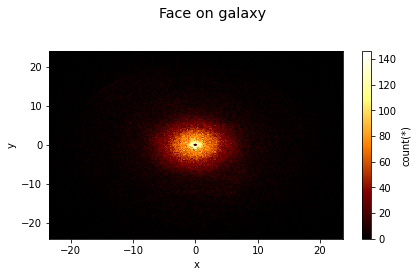

In [3]:
df.viz.heatmap('x', 'y', title='Face on galaxy', limits='99%');

### Multiple plots of the same type

The first argument can be a list of axes pairs. This produces multiple plots:

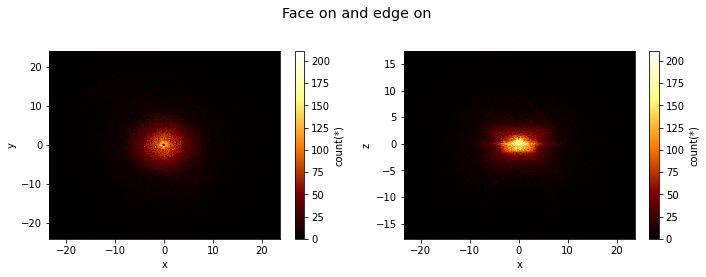

In [4]:
df.viz.heatmap([["x", "y"], ["x", "z"]], title="Face on and edge on", figsize=(10, 4), limits='99%');

### Multiple plots, same axes, different statistics

If the `what` argument is a list, it will by default create multiple subplots:

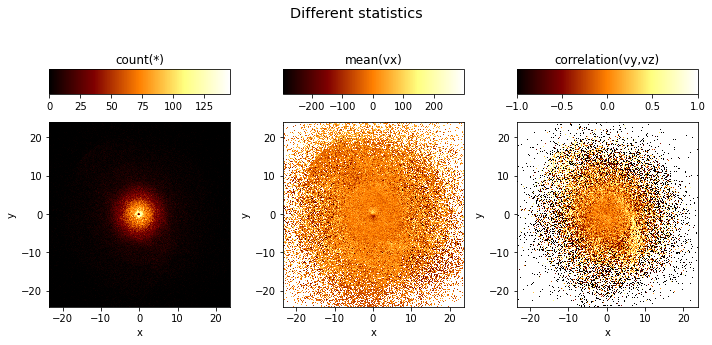

In [5]:
df.viz.heatmap("x", "y", what=["count(*)", "mean(vx)", "correlation(vy,vz)"], 
               title="Different statistics", 
               figsize=(10, 5), limits='99%');

### Multiple plots, different axes, different statistics

One can specify multiple axes pairs as tje first argument, as well as a list of `what` arguments. The resulting figure with have a number of subplots where the different axes combinations will form the rows, and the different `what` statistics will form the columns:

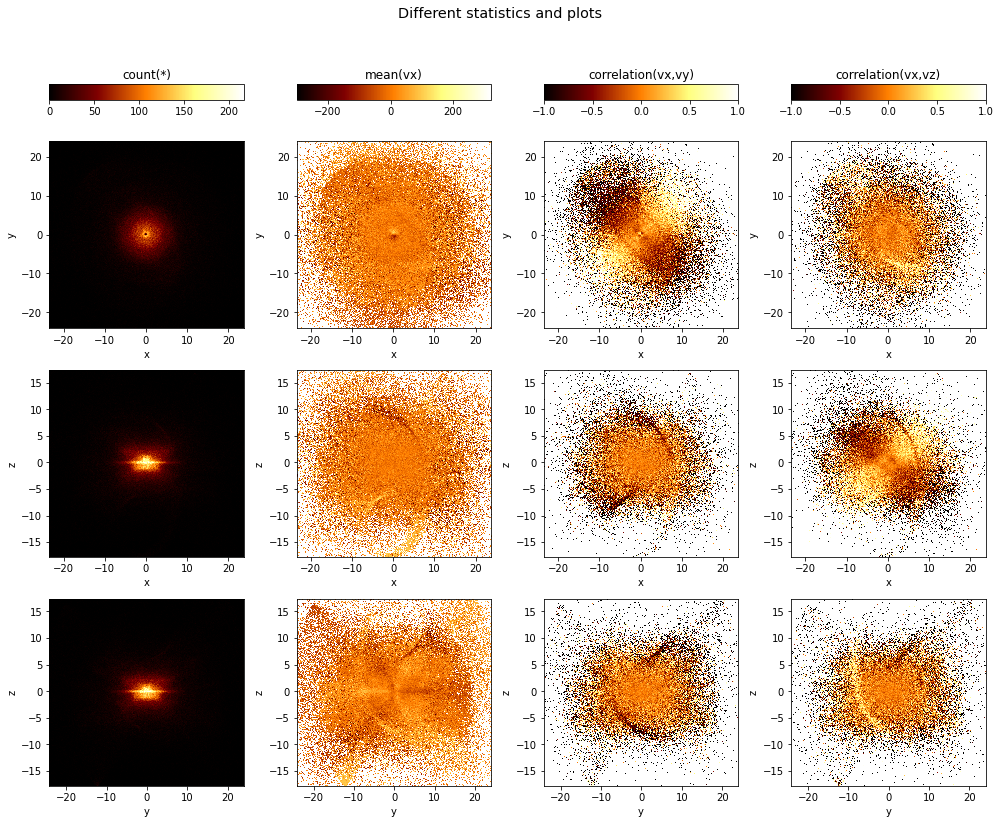

In [6]:
df.viz.heatmap([["x", "y"], ["x", "z"], ["y", "z"]],
               what=["count(*)", "mean(vx)", "correlation(vx,vy)", "correlation(vx,vz)"],
               title="Different statistics and plots", 
               figsize=(14,12), 
               limits='99%');

One can also specify the layout of the figure via the `visual` argument, which can be used to swap the row and column ordering of the subplots:

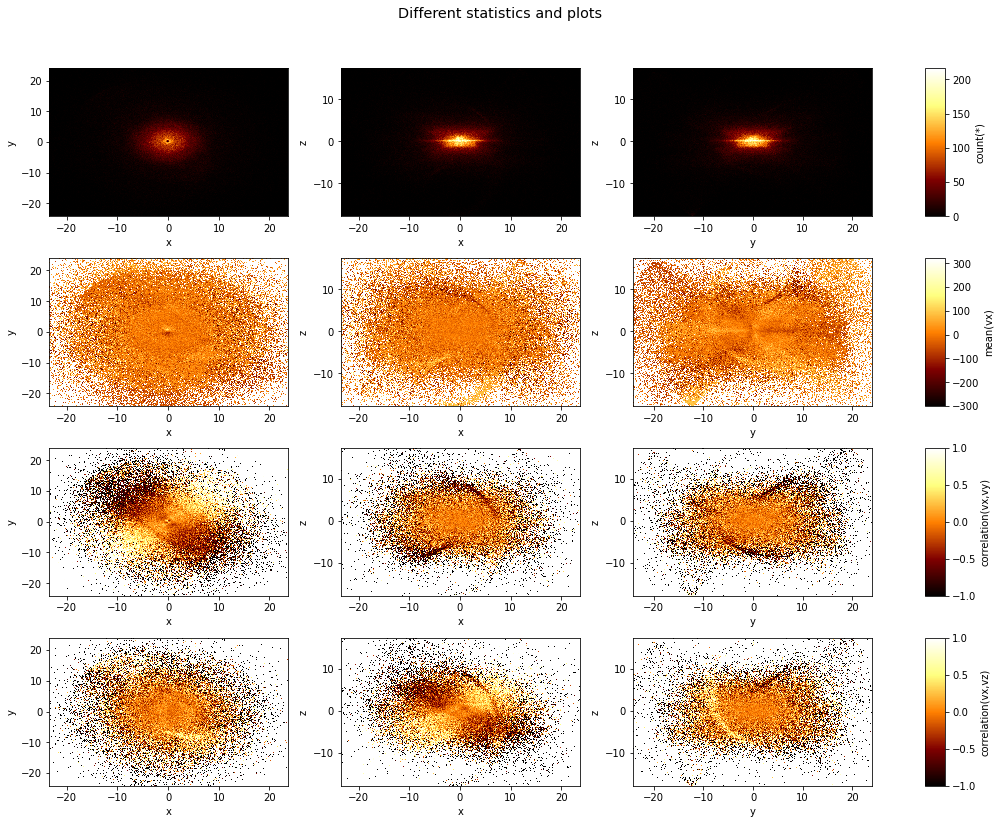

In [7]:
df.viz.heatmap([["x", "y"], ["x", "z"], ["y", "z"]],
               what=["count(*)", "mean(vx)", "correlation(vx,vy)", "correlation(vx,vz)"],
               visual=dict(row="what", column="subspace"),
               title="Different statistics and plots", 
               figsize=(14,12), 
               limits='99%');

### Slices in a 3rd dimension

If a 3rd axis (`z`) is given, you can "slice" through the data, displaying the `z` slices as rows.  Note that here the rows are wrapped, which can be changed with the `wrap_columns` argument:

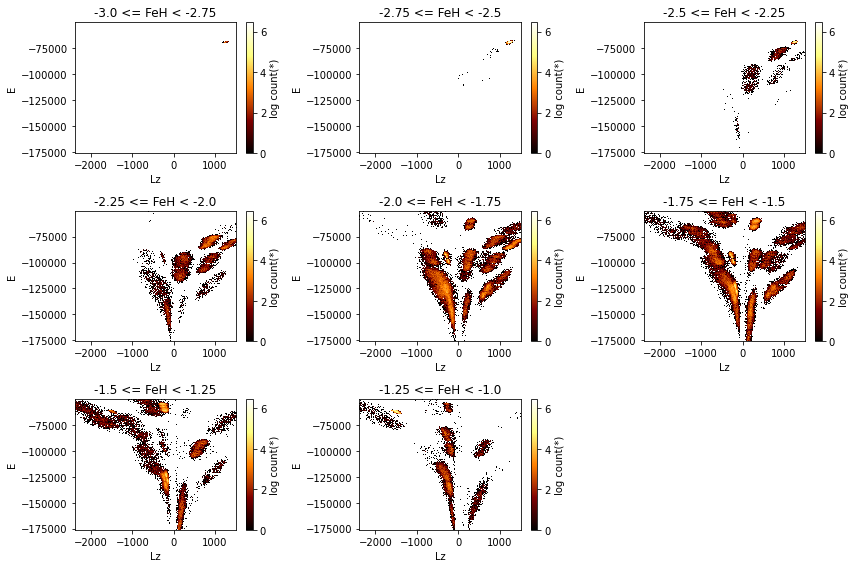

In [8]:
df.viz.heatmap("Lz", "E", z="FeH:-3,-1,8", 
               visual=dict(row="z"), 
               figsize=(12, 8), 
               f="log", 
               wrap_columns=3, 
               limits='99%');

### Many plots with wrapping

If one attempt to create a figure with many subplots, they will be nice wrapped. Where we create heatmaps of all combinations of columns in the example dataset, sorted by their [mutual information](https://en.wikipedia.org/wiki/Mutual_information):

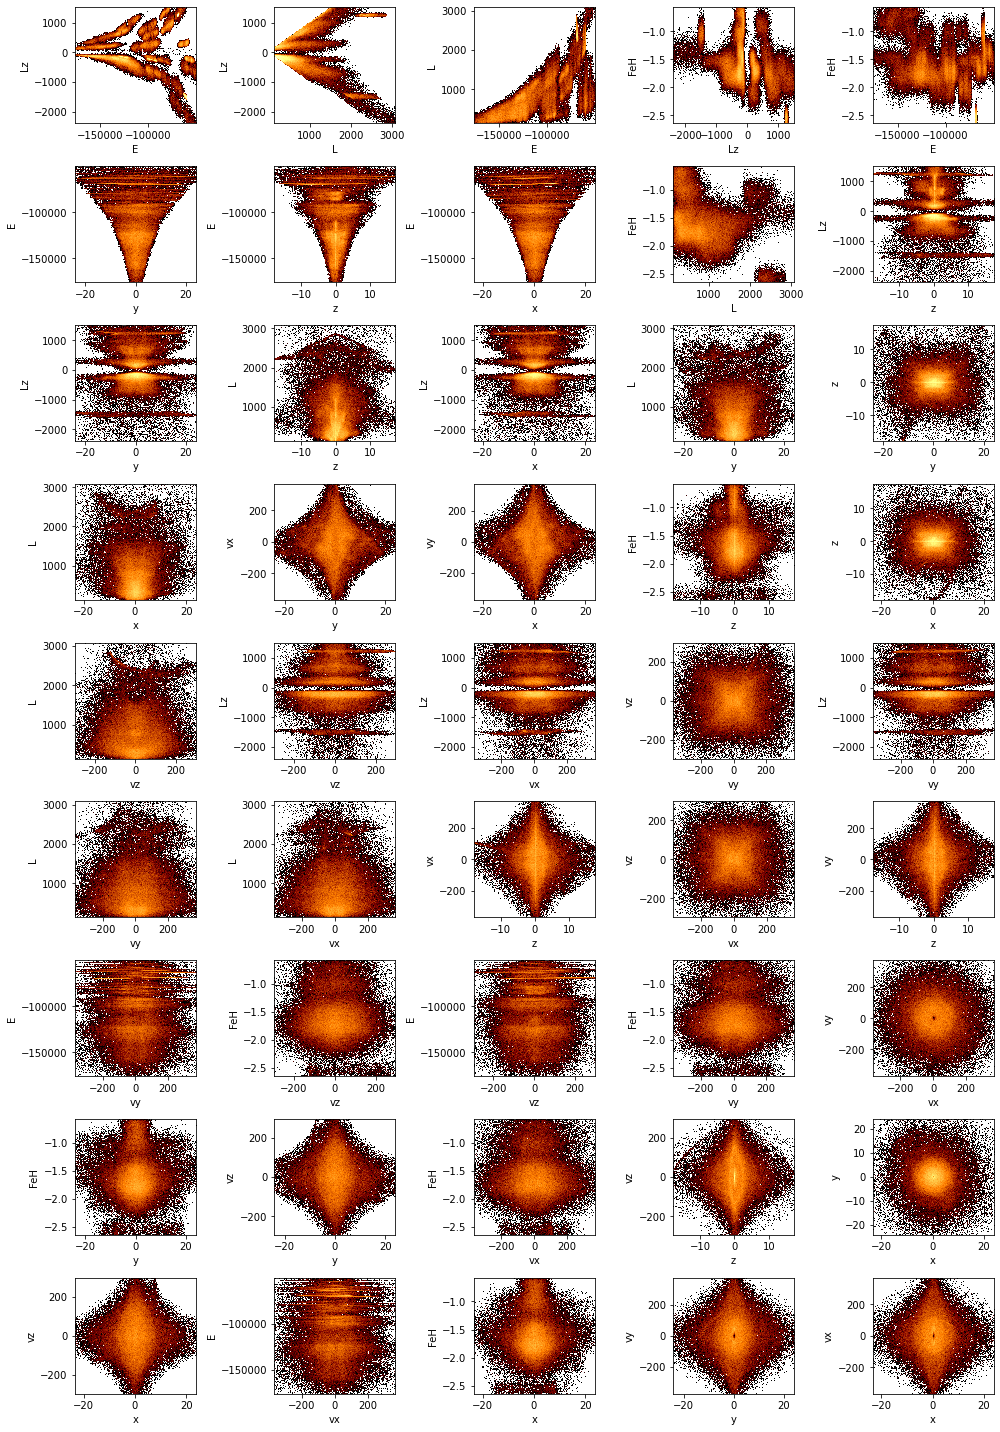

In [9]:
# Get all column pars
pairs = df.combinations(exclude=['id'])
# Calculate the mutual information for each pair, sorted by the largest value
mi, pairs_sorted = df.mutual_information(pairs, sort=True)

# Create the figure
df.viz.heatmap(pairs_sorted, f='log', colorbar=False, figsize=(14, 20), limits='99%', wrap_columns=5);

### Plotting selections

If the `selection` argument is used, than only the selection is plotted:

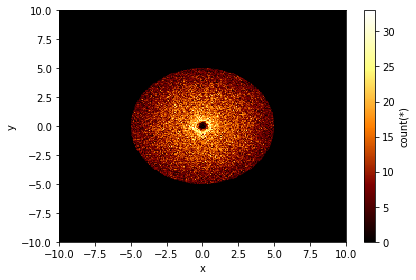

In [10]:
df.viz.heatmap("x", "y", selection="sqrt(x**2+y**2) < 5", limits=[-10, 10]);

If a list of selections is specified (`False` or `None` indicates no selection), than every selection by default forms a different "layer" of the figure produced:

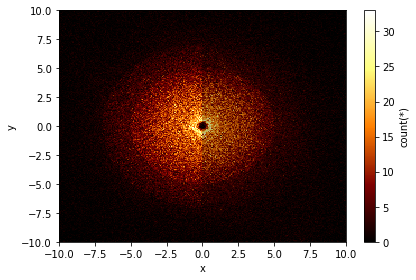

In [11]:
df.viz.heatmap("x", "y", 
               selection=[None, "sqrt(x**2+y**2) < 5", "(sqrt(x**2+y**2) < 7) & (x < 0)"], 
               limits=[-10, 10]);

### Overplotting a vector field on a heatmap

Astronomers argue that galaxies such as our own Milky Way were formed from many pre-galactic clumps that have merged and mixed together. One way to try and find the original pre-galactic fragments is to inspect the 2-dimensinoal distribution of their energy (𝐸) and angular momentum (𝐿𝑧). So let us make such a plot:

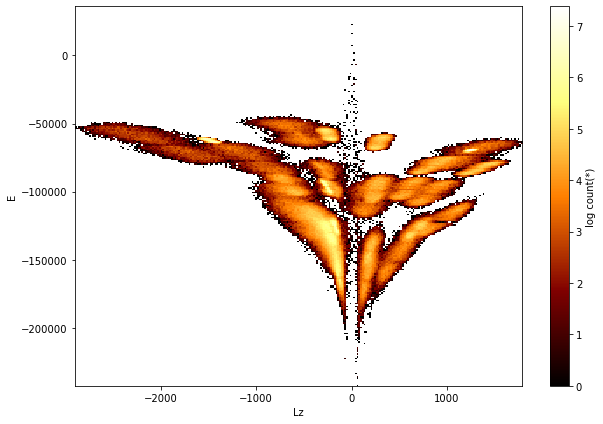

In [12]:
df.viz.heatmap('Lz', 'E', f='log', figsize=(9, 6));

Now, to show that the stars in each clump on the figure above are indeed moving coherently in space, we can overplot their velocity vectors on a positional heatmap.

First, let's select the stars that belong to one the clusters:

In [13]:
# specify ranges of angular momentum (Lz) and energy (E)
limits_Lz_E_clump = (1181.770, 1291.92), (-70850.91, -68491.16)

# Use the rectangle selection method
df.select_rectangle("Lz", "E", limits_Lz_E_clump, name="stream")

# Check how many stars we have selected
print(f'Selection contains {df.count(selection="stream")} "stars".')

Selection contains 9556 "stars".


We can also overplot the selected region, to convince ourselves that we have chosen a good region:

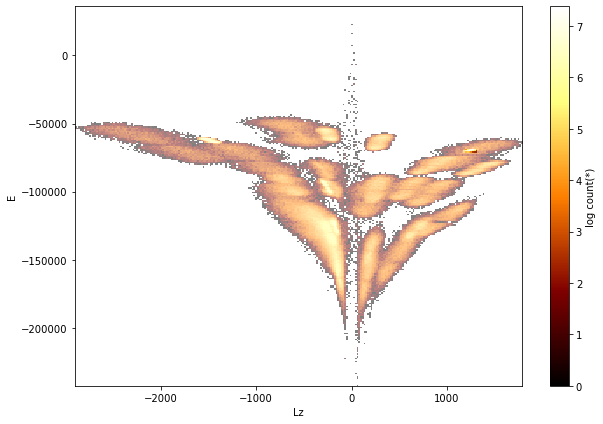

In [14]:
df.viz.heatmap("Lz", "E", selection=[None, "stream"], f="log", figsize=(9, 6));

Now let us plot the 𝑣𝑦 and 𝑣𝑧 velocity vectors on top of 𝑦−𝑧 plot. To start, lets compute a grid of mean 𝑣𝑦 and 𝑣𝑧 velocities. Notice that we are limiting the range of the 𝑣𝑦 and 𝑣𝑧 values to go between -20 and 20, and the grid resolution is 32x32 bins:

In [15]:
limits = [-20, 20]
shape_vector = 32
mean_vy = df.mean("vy", binby=["y", "z"], limits=limits, shape=shape_vector, selection='stream')
mean_vz = df.mean("vz", binby=["y", "z"], limits=limits, shape=shape_vector, selection='stream')

Next, let us create a meshgrid to hold the centres of the bins:

In [16]:
# create a 2d array with holds the center of the bins
centers = np.linspace(*limits, shape_vector, endpoint=False) + (limits[1] - limits[0])/2./shape_vector
z, y = np.meshgrid(centers, centers)

To keep the plot "clean", we also do not want visualize the velocity of the bins with low number counts:

In [17]:
# we don't want to show bins with low number of counts
counts = df.count(binby=["y", "z"], limits=limits, shape=shape_vector, selection='stream')
mask = counts.flatten( ) > 10

Finally we can plot a background density map of $v_y$ vs $v_z$, and then use  `pylab.quiver` to overplot the velocity vectors:

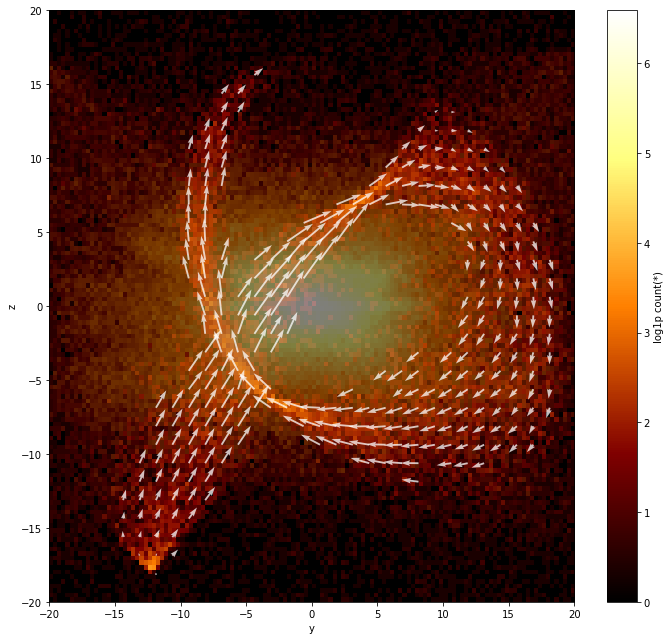

In [18]:
df.viz.heatmap("y", "z", limits=limits, f="log1p", figsize=(10, 9), selection=[None, "stream"], shape=128)

# overplot the mean velocity vectors
plt.quiver(y.flatten()[mask], 
           z.flatten()[mask], 
           mean_vy.flatten()[mask], 
           mean_vz.flatten()[mask], 
           color="white", 
           alpha=0.75);

We indeed see that the stars we selected move together, and form a stream!

### Plotting a healpix map

[Healpix](https://en.wikipedia.org/wiki/HEALPix) is made available via the [healpy](healpy.readthedocs.io) package. Vaex does not need special support for healpix, but some helper functions are introduced to make working with healpix easier.

Make sure you have healpy installed. If you do not, you can install it with one of these commands:
```
!pip install healpy  # if you prefer pip
!conda install -c conda-forge healpy if you are using a conda package manager
```

To understand this better, we will start from the beginning. If we want to make a density sky plot, we would like to pass to healpy a 1d numpy array where each value represents the density at a location of the sphere, where the location is determined by the array size (the healpix level) and the offset (the location). 

This example uses a simulated [Gaia](https://sci.esa.int/web/gaia) dataset. The Gaia data includes the healpix index encoded in the `source_id` column. By diving `source_id` by 34359738368 you get a healpix index level 12, and diving it further will take you to lower levels.

Let us start by fetching the dataset (Note: the dataset is ~700MB on disk).

In [19]:
import healpy as hp

In [20]:
df = vaex.datasets.tgas.fetch()
df.head()

#,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_n_bad_obs_ac,astrometric_n_bad_obs_al,astrometric_n_good_obs_ac,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_primary_flag,astrometric_priors_used,astrometric_relegation_factor,astrometric_weight_ac,astrometric_weight_al,b,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,duplicated_source,ecl_lat,ecl_lon,hip,l,matched_observations,parallax,parallax_error,parallax_pmdec_corr,parallax_pmra_corr,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_g_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,random_index,ref_epoch,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,solution_id,source_id,tycho2_id
0,1.91906,0.717101,412.606,1,0,78,79,79,79,84,3,2.9361,1.26696e-05,1.81816,-48.7144,0.235392,0.218802,-0.407338,0.0606588,-0.0994513,70,-16.1211,42.6418,13989,176.74,9,6.35295,0.30791,-0.101957,-0.00157679,1.03123e+07,10577.4,7.99138,77,b'NOT_AVAILABLE',-7.64199,0.0874018,43.7523,0.0705422,0.214677,45.0343,-0.414972,0.305989,0.179966,-0.0857597,0.159207,243619,2015,-113.76,21.3929,-41.6784,26.2018,0.382348,0.538266,0.392379,0.916306,1635378410781933568,7627862074752,b''
1,nan,0.253463,47.3163,2,0,55,57,57,57,84,5,2.65231,3.16002e-05,12.8616,-48.645,0.200068,1.19779,0.837626,-0.975644,0.972577,70,-16.193,42.7612,-2147483648,176.916,8,3.90033,0.323488,-0.853779,0.839739,949565,1140.17,10.581,62,b'NOT_AVAILABLE',-55.1092,2.52293,10.0363,4.61141,-0.996399,45.165,-0.995923,2.58388,-0.860911,0.97348,-0.972417,487238,2015,-156.433,22.7661,-36.2397,22.8906,0.711003,0.96597,0.646115,0.86716,1635378410781933568,9277129363072,b'55-28-1'
2,nan,0.398901,221.185,4,1,57,60,61,61,84,5,3.9934,2.56339e-05,5.76753,-48.6678,0.248825,0.180326,-0.391891,-0.193256,0.0894205,70,-16.1234,42.6975,-2147483648,176.78,7,3.15531,0.273484,-0.118552,-0.0418587,817838,1827.38,10.7431,60,b'NOT_AVAILABLE',-1.60287,1.03526,2.93228,1.90864,-0.914271,45.0862,-0.177443,0.213836,0.307722,-0.184817,0.0468668,1948952,2015,-117.008,19.7722,-43.1082,26.7157,0.482528,0.428758,0.524153,0.903062,1635378410781933568,13297218905216,b'55-1191-1'
3,nan,0.422492,179.982,1,0,51,52,52,52,84,5,4.21516,2.86726e-05,5.36086,-48.6824,0.248211,0.200958,-0.337217,-0.223501,0.131811,70,-16.1182,42.6778,-2147483648,176.76,7,2.29237,0.280972,-0.109202,-0.0494409,602053,905.877,11.0757,61,b'NOT_AVAILABLE',-18.4149,1.12985,3.66198,2.06505,-0.926177,45.0665,-0.365707,0.276039,0.202878,-0.0589288,-0.0509089,102321,2015,-132.421,22.5693,-38.9545,25.8786,0.494655,0.638456,0.509074,0.898918,1635378410781933568,13469017597184,b'55-624-1'
4,nan,0.3175,119.748,2,3,85,84,87,87,84,5,3.23564,2.22788e-05,8.08078,-48.572,0.335044,0.17013,-0.438708,-0.279349,0.121792,70,-16.0555,42.7734,-2147483648,176.739,11,1.58208,0.261539,-0.329196,0.100312,1.38812e+06,2826.43,10.1687,96,b'NOT_AVAILABLE',-2.37939,0.710632,0.340802,1.22048,-0.833604,45.136,-0.0490526,0.170697,0.471425,-0.156392,-0.152076,409284,2015,-106.86,4.4521,-47.8954,26.7555,0.520654,0.23931,0.653377,0.863385,1635378410781933568,15736760328576,b'55-849-1'
5,nan,0.303723,64.6868,2,1,68,69,70,70,84,5,3.10892,2.22511e-05,9.65279,-48.5511,0.359618,0.179848,-0.437142,-0.376402,0.257906,70,-16.0335,42.7861,-2147483648,176.718,9,8.66308,0.255867,-0.297309,0.0791063,1.66384e+06,1381.58,9.97199,76,b'NOT_AVAILABLE',-72.7114,0.720852,-52.8493,1.26429,-0.852784,45.1414,-0.264588,0.205008,0.39493,0.102073,-0.36853,204642,2015,-127.824,16.3828,-44.2417,25.1631,0.522809,0.479366,0.621515,0.847412,1635378410781933568,16527034310784,b'55-182-1'
6,nan,0.340405,118.911,2,1,76,77,78,78,84,5,3.44745,2.19728e-05,7.91894,-48.5242,0.386343,0.17188,-0.341053,-0.34408,0.1516,70,-16.0114,42.8058,-2147

Let's plot a healpix figure of level 2. We can start by counting the number of stars in each healpix region:

In [21]:
level = 2
factor = 34359738368 * (4**(12-level))
nmax = hp.nside2npix(2**level)
counts = df.count(binby="source_id/" + str(factor), limits=[0, nmax], shape=nmax)
counts

array([ 4021,  6171,  5318,  7114,  5755, 13420, 12711, 10193,  7782,
       14187, 12578, 22038, 17313, 13064, 17298, 11887,  3859,  3488,
        9036,  5533,  4007,  3899,  4884,  5664, 10741,  7678, 12092,
       10182,  6652,  6793, 10117,  9614,  3727,  5849,  4028,  5505,
        8462, 10059,  6581,  8282,  4757,  5116,  4578,  5452,  6023,
        8340,  6440,  8623,  7308,  6197, 21271, 23176, 12975, 17138,
       26783, 30575, 31931, 29697, 17986, 16987, 19802, 15632, 14273,
       10594,  4807,  4551,  4028,  4357,  4067,  4206,  3505,  4137,
        3311,  3582,  3586,  4218,  4529,  4360,  6767,  7579, 14462,
       24291, 10638, 11250, 29619,  9678, 23322, 18205,  7625,  9891,
        5423,  5808, 14438, 17251,  7833, 15226,  7123,  3708,  6135,
        4110,  3587,  3222,  3074,  3941,  3846,  3402,  3564,  3425,
        4125,  4026,  3689,  4084, 16617, 13577,  6911,  4837, 13553,
       10074,  9534, 20824,  4976,  6707,  5396,  8366, 13494, 19766,
       11012, 16130,

Using the healpy package, we can plot this in a molleweide projection

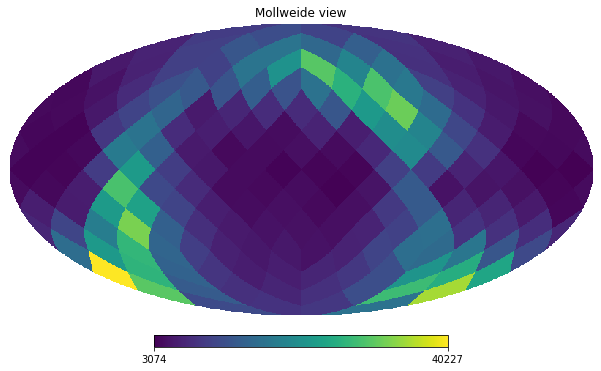

In [22]:
hp.mollview(counts, nest=True);

To avoid tying the above code all over again, we can use the [df.healpix_count](https://vaex.readthedocs.io/en/latest/_modules/vaex/dataframe.html#DataFrame.healpix_count) method instead:

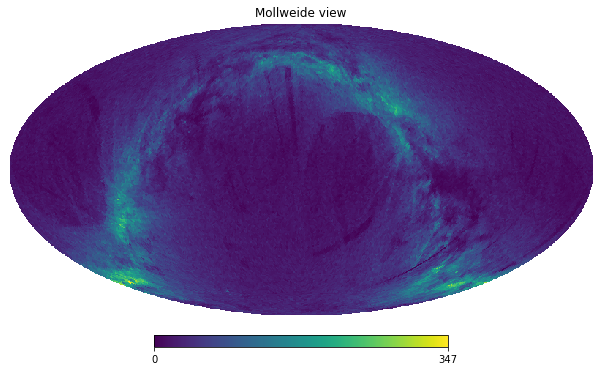

In [23]:
counts = df.healpix_count(healpix_level=6)
hp.mollview(counts, nest=True)

Instead of using healpy, we can use vaex' `df.viz.healpix_plot` method:

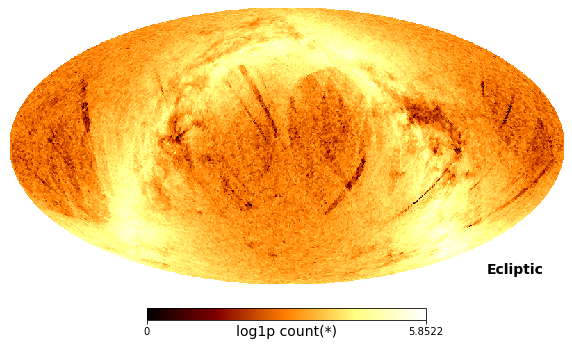

In [24]:
df.viz.healpix_heatmap(f="log1p", healpix_level=6, figsize=(10,8), healpix_output="ecliptic")